# Creating custom Layers in Keras

# 1. Importing Libraries

In [1]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.5.0


# 2. Import and Visualize Dataset

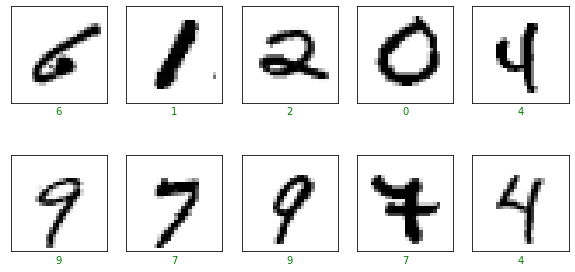

In [2]:
(x_train, y_train), (x_test, y_test) = utils.load_data()

utils.plot_random_examples(x_train, y_train).show()

# 3. Creating a Custom Layer

Parametric Relu is actually very similar to Leaky relu, with one difference. In Leaky you have the parameter alpha, which is defined and set by the user, whereas in parameter value that alpha is a trainable parameter, and it's actually learned during the training process.


Now this Parametric relu activation layer already exists in keras, along with leaky relu and relu, of course. And the idea here is not to create something which does not exist in keras as it already does but we'll be using parameter relu just as an example of creating custom layers.

When you're creating a custom layer, you need to usually implement at least three functions. There's going to be a build function where you will define any trainable weights. You will create a call function where the logic of your custom layer is. And finally, there is a compute output shape function which is the transformation logic for your layers. So if there is any change in shape happening in your layer, then this is very that transformation logic needs to be written out as well.

In [10]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs): # (self, init_value, **kwargs) - if set initial value for alpha
        #self.init_value = init_value 
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight( # To create a trainable parameter i.e alpha
            name='alpha', 
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x) # MAIN LOGIC

This is parameteric relu, which is essentially just leaky relu with the learnable parameter alpha.

So the logic here is, If x is +ve then (tf.maximum) term becomes X and (tf.minimum) term becomes zero if x is +ve. So (tf.minimum) is zero and we get just X. And if X is negative, then (tf.maximum) becomes 0 and (tf.minimum) becomes the negative value of X, whatever that is. So if X is minus one, for example, then this becomes minus one multiplied by alpha. Okay, so that's the leaky relu logic and essentially, just the alpha is trainable in this case.

# 4. Creating the Model

In [11]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,))) # First hidden layer with input shape as 784, since each example is a dimensional vector
    if not use_prelu: # Ofcourse, one may not get the same accuracy, but your results will be comparable as well
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
    model.add(tf.keras.layers.Dense(10, activation='softmax')) # 10 nodes for the 10 classes
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
parametric_relu_1 (Parametri (None, 64)                1         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# 5. Model Training

In [5]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

print('Final alpha:', model.layers[1].get_weights())

Initial alpha: [array([0.], dtype=float32)]
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3131 - accuracy: 0.9117 - val_loss: 0.1609 - val_accuracy: 0.9529
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1375 - accuracy: 0.9597 - val_loss: 0.1176 - val_accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0934 - accuracy: 0.9719 - val_loss: 0.1013 - val_accuracy: 0.9694
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.9782 - val_loss: 0.0954 - val_accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0982 - val_accuracy: 0.9722
Final alpha: [array([-0.7987119], dtype=float32)]


As per the equation that we implemented, this basically means that when your X is positive, the output of this activation is positive and is infact equal to X. But what it's saying is that when X is negative, then alpha is negative as well, so that makes it a positive number, just a fraction. So it's a linear output for X greater than 0. And again it's kind of the same thing, but simply X is
negative, but the Y is still going to be positive.

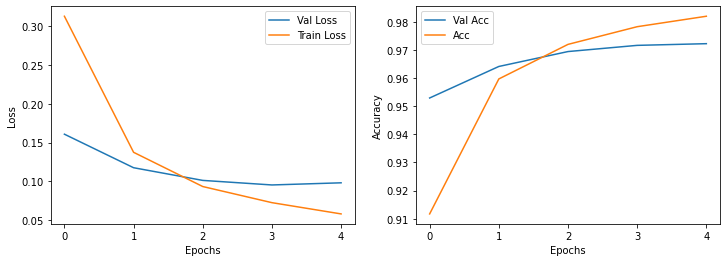

In [6]:
utils.plot_results(h).show()

# 6. Comparison with ReLU

In [7]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3081 - accuracy: 0.9133 - val_loss: 0.1771 - val_accuracy: 0.9496
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1471 - accuracy: 0.9575 - val_loss: 0.1349 - val_accuracy: 0.9577: 0s - loss: 0.1496 - ac
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9680 - val_loss: 0.1041 - val_accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0829 - accuracy: 0.9748 - val_loss: 0.0943 - val_accuracy: 0.9701
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 0.0932 - val_accuracy: 0.9716


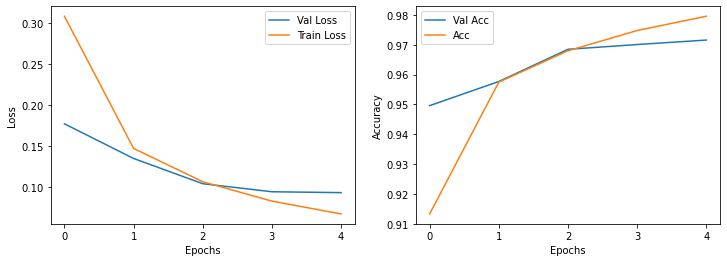

In [9]:
utils.plot_results(h).show()